# Orbit Integrations (and more)
Jack Hong

In [1]:
from __future__ import division
from galpy.orbit import Orbit
from galpy.potential import SpiralArmsPotential, MWPotential2014
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from galpy.potential import evaluateDensities

def rel_den_perturbation(amp, Rs=0.5, H=0.5, r_ref=1):
    sp = SpiralArmsPotential(amp=amp, Rs=Rs, H=H, r_ref=r_ref)
    mp = MWPotential2014
    R = 1
    nzs = 50
    nphis = 50
    zs = np.linspace(-1, 1, nzs)
    phis = np.linspace(0, np.pi, nphis)
    r = np.zeros(nzs)
    counter = 0
    for jj in range(nzs):
        sp_dens = np.zeros(nphis)
        for kk in range(nphis):       
            sp_dens[kk] = evaluateDensities(sp, R, zs[jj], phis[kk])

        mp_dens = evaluateDensities(mp, R, zs[jj])
        r[counter] = max(sp_dens) / mp_dens
        counter = counter + 1
            
    avg = np.mean(r)
    stddev = np.std(r)
    return avg, stddev, r

rel_den_perturbation(.5)

(0.38655719671409083,
 0.24890228184474705,
 array([ 0.05161601,  0.06445687,  0.07984344,  0.09808897,  0.11966135,
         0.14499956,  0.17411242,  0.20715014,  0.24416114,  0.28506777,
         0.32973104,  0.37822903,  0.42951098,  0.48278562,  0.53704279,
         0.59102814,  0.64318585,  0.69151639,  0.7332178 ,  0.7637543 ,
         0.77433185,  0.74491612,  0.628392  ,  0.36366589,  0.10346443,
         0.10346443,  0.36366589,  0.628392  ,  0.74491612,  0.77433185,
         0.7637543 ,  0.7332178 ,  0.69151639,  0.64318585,  0.59102814,
         0.53704279,  0.48278562,  0.42951098,  0.37822903,  0.32973104,
         0.28506777,  0.24416114,  0.20715014,  0.17411242,  0.14499956,
         0.11966135,  0.09808897,  0.07984344,  0.06445687,  0.05161601]))

In [3]:
sp = SpiralArmsPotential(amp=.5)  # amp <= 3 for positive density
mp = MWPotential2014
pot = [sp] + mp

/Users/jackhong/OneDrive/SURP/galpy/galpy/potential_src/SpiralArmsPotential.py:550: RuntimeWarning: divide by zero encountered in log
  return self._N * (phi - self._phi_ref - np.log(R / self._r_ref) / self._tan_alpha)

/Users/jackhong/OneDrive/SURP/galpy/galpy/potential_src/SpiralArmsPotential.py:558: RuntimeWarning: divide by zero encountered in true_divide
  return self._ns * self._N / R / self._sin_alpha

/Users/jackhong/OneDrive/SURP/galpy/galpy/potential_src/SpiralArmsPotential.py:566: RuntimeWarning: divide by zero encountered in true_divide
  HNn_R = self._HNn / R

/Users/jackhong/OneDrive/SURP/galpy/galpy/potential_src/SpiralArmsPotential.py:577: RuntimeWarning: divide by zero encountered in true_divide
  + self._HNn * R + R**2 * self._sin_alpha) / R / (0.3 * self._HNn + 1 * R * self._sin_alpha)

/Users/jackhong/OneDrive/SURP/galpy/galpy/potential_src/SpiralArmsPotential.py:511: RuntimeWarning: invalid value encountered in multiply
  zKB = z * Ks / Bs

/Users/jackhong/OneDrive

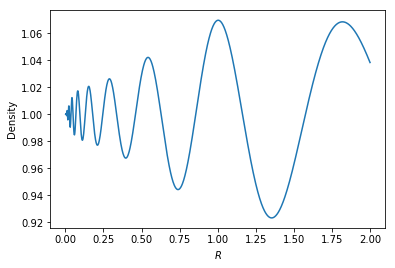

In [4]:
R = np.linspace(0, 2, 1000)
sp_dens = np.zeros(R.size)
mp_dens = np.zeros(R.size)

for k in range(len(R)):
    sp_dens[k] = evaluateDensities(pot, R[k], 0, 0)
    mp_dens[k] = evaluateDensities(mp, R[k], 0)
        
plt.plot(R, sp_dens / mp_dens)    
plt.xlabel("$R$")
plt.ylabel("Density")
plt.show()

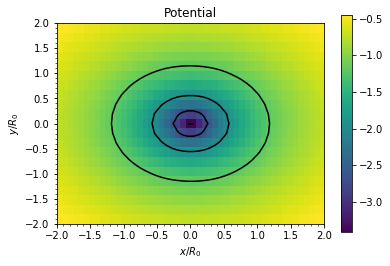

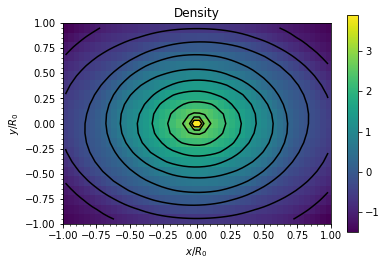

In [5]:
from galpy.potential import plotPotentials, plotDensities
pot_plt = plotPotentials(pot, xy=True, rmin=-2, rmax=2, zmin=-2, zmax=2, ncontours=5, nrs=50)
pot_plt.colorbar = plt.colorbar(pot_plt)
pot_plt.set_cmap('viridis')
plt.title('Potential')

den_plt = plotDensities(pot, xy=True, rmin=-1, rmax=1, zmin=-1, zmax=1, ncontours=13, nrs=50, log=True)
den_plt.colorbar = plt.colorbar(den_plt)
den_plt.set_cmap('viridis')
plt.title('Density')
plt.show()

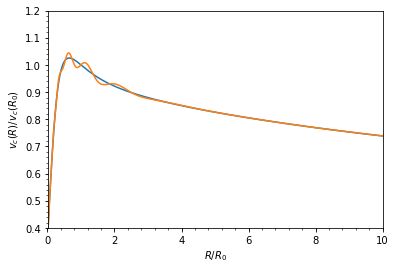

In [6]:
from galpy.potential import plotRotcurve
plotRotcurve(mp, Rrange=[0.01,10.], grid=1001, yrange=[0.4,1.2])
plotRotcurve(pot, Rrange=[0.01,10.], grid=1001, phi=0, yrange=[0.4,1.2], overplot=True)

plt.show()

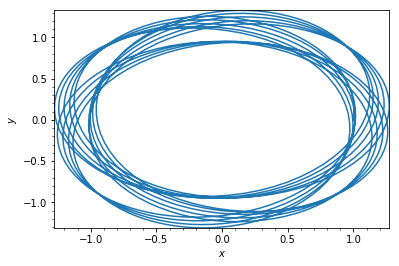

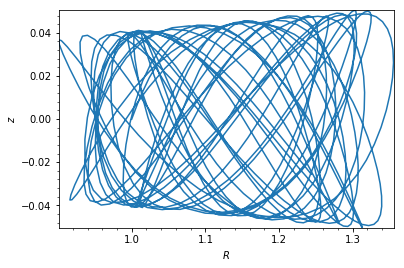

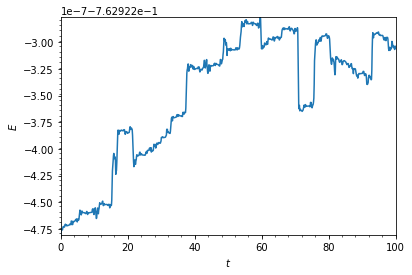

In [7]:
orb = Orbit(vxvv=[1, 0.1, 1.1, 0, 0.1, 0])
ts = np.linspace(0,100,1000)
orb.integrate(ts, pot, method='odeint')
orb.plot(d1='x', d2='y')
orb.plot()
orb.plotE()
plt.show()

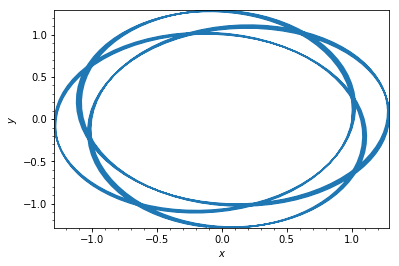

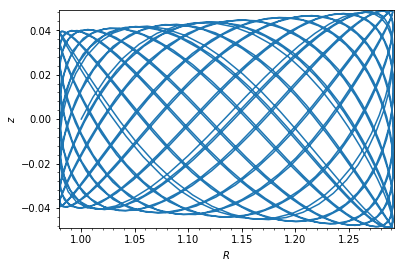

In [8]:
orb = Orbit(vxvv=[1, 0.1, 1.1, 0, 0.1, 0])
ts = np.linspace(0,100,1000)
orb.integrate(ts, mp, method='odeint')
orb.plot(d1='x', d2='y')
orb.plot()
plt.show()